In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA (Exploratory Data Analysis)

In [2]:
# Se carga los dos datasets creados

df=pd.read_csv("Datasets/df.csv")
df_1=pd.read_parquet("Datasets/df_1.parquet")

Dataframe df corresponde a los datos de las plaraformas de streaming.

In [15]:
# df plataformas

df.head(3)

,id,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,plataforma,duration_int,duration_type
0,as1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,r,comedy,a small fishing village must procure a local d...,amazon,113.0,min
1,as2,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,tv shows,a metro family decides to fight a cyber crimin...,amazon,110.0,min
2,as3,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,r,horror & suspence,after a man discovers his wife is cheating on ...,amazon,74.0,min


df_1 es el dataframe de las puntuaciones a las peliculas.

In [27]:
#df_1
df_1.head(3)

,user,score,id,plataforma,year_scored
0,1,1.0,as680,amazon,2015
1,1,4.5,ns2186,netflix,2015
2,1,5.0,hs2381,hulu,2015


In [4]:
# Se evalua los: max, min y promedio del 'score'.

print (f'El score promedio = {round(df_1.score.mean(),2)}')
print (f'El score maximo ={round(df_1.score.max(),2)}')
print (f'El score minimo = {round(df_1.score.min(),2)}')

El score promedio = 3.53
El score maximo =5.0
El score minimo = 0.5


In [81]:
f'hay {len(df_1)} calificaciones (score) con un total de {df_1.user.unique().shape[0]} usuarios que calificaron las peliculas/series'

'hay 11005757 calificaciones (score) con un total de 115077 usuarios que calificaron las peliculas/series'

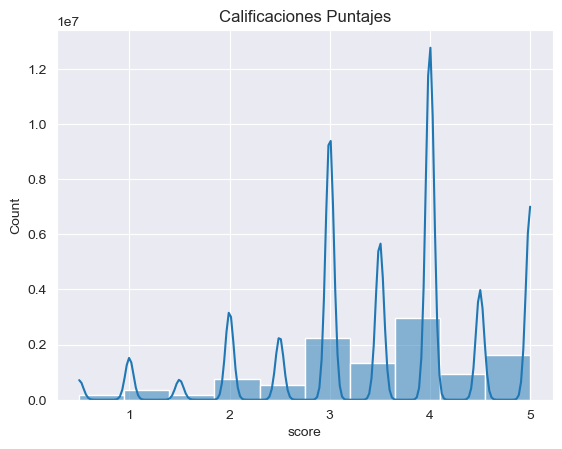

In [13]:
# Tema para los graficos
sns.set_style("darkgrid")

# Grafico distribucón de calificaciones

sns.histplot(data=df_1, x='score', kde=True, bins=10)
plt.xlabel('score')
plt.title('Calificaciones Puntajes')
plt.show()

In [29]:
# Se calcula el porcentaje de cada score respecto al total de calificaciones 

score_menor_1= round(len(df_1[df_1['score'] <= 1])*100/len(df_1),2)
score_menor_2=  round(len(df_1[(df_1['score'] > 1) & (df_1['score'] <= 2)])*100/len(df_1),2)
score_menor_3=  round(len(df_1[(df_1['score'] > 2) & (df_1['score'] <= 3)])*100/len(df_1),2)
score_menor_4=  round(len(df_1[(df_1['score'] > 3) & (df_1['score'] <= 4)])*100/len(df_1),2)
score_menor_5=  round(len(df_1[(df_1['score'] > 4) & (df_1['score'] <= 5)])*100/len(df_1),2)

print (f' calificaciones menores e iguales a 1: {score_menor_1} %')
print (f' calificaciones menores e iguales a 2: {score_menor_2} %')
print (f' calificaciones menores e iguales a 3: {score_menor_3} %')
print (f' calificaciones menores e iguales a 4: {score_menor_4 }%')
print (f' calificaciones menores e iguales a 5: {score_menor_5} %')

 calificaciones menores e iguales a 1: 4.67 %
 calificaciones menores e iguales a 2: 8.24 %
 calificaciones menores e iguales a 3: 25.07 %
 calificaciones menores e iguales a 4: 39.01%
 calificaciones menores e iguales a 5: 23.02 %


In [19]:
#  Se calcula Frecuencia de usuarios por score

top_score=df_1.groupby(["score"])["user"].count()
top_score=top_score.reset_index()
top_score.columns=['score','usuarios']
top_score=top_score.head(10)
top_score

,score,usuarios
0,0.5,163864
1,1.0,350273
2,1.5,167309
3,2.0,739173
4,2.5,529789
5,3.0,2228882
6,3.5,1327305
7,4.0,2965870
8,4.5,918678
9,5.0,1614614


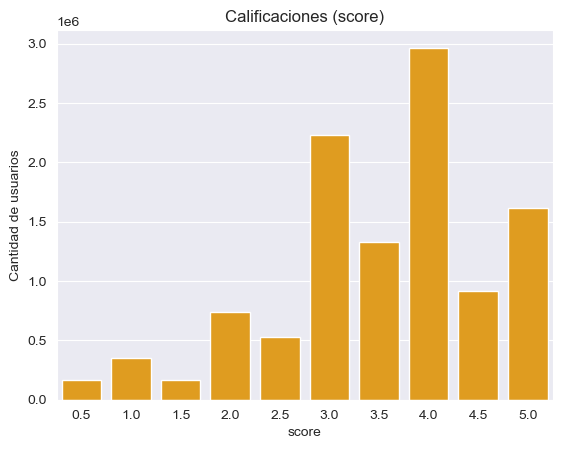

In [20]:
# gráfico de barras 
sns.barplot(y='usuarios', x='score', data=top_score, color='orange')

# títulos y etiquetas de los ejes
plt.ylabel('Cantidad de usuarios')
plt.xlabel('score')
plt.title('Calificaciones (score)')


plt.show()

In [21]:
# Usuarios que más veces han votado.

print(f'El Top 10 de usuarios que más veces han calificado peliculas es:')

top_users=df_1[['user','score']].groupby(['user']).count().sort_values( by='score',ascending=False)
top_users=top_users.reset_index()
top_users.columns=['id_user','cantidad_scores']
top_users=top_users.head(10)
top_users

El Top 10 de usuarios que más veces han calificado peliculas es:


,id_user,cantidad_scores
0,45811,17719
1,8659,9171
2,270123,7482
3,70648,5291
4,24025,4861
5,74275,4782
6,41190,4761
7,65469,4491
8,59449,4377
9,59554,4218


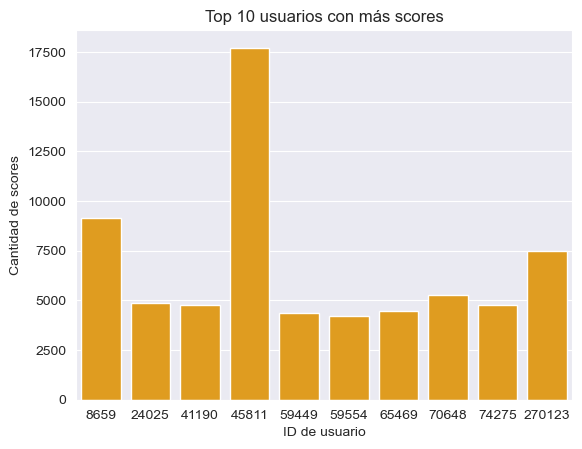

In [22]:
# gráfico de barras 
sns.barplot(y='cantidad_scores', x='id_user', data=top_users, color='orange')

# títulos y etiquetas de los ejes
plt.ylabel('Cantidad de scores')
plt.xlabel('ID de usuario')
plt.title('Top 10 usuarios con más scores')

plt.show()

In [27]:
# Peliculas más vistas

top_movie=df_1[['id','score']].groupby(['id']).count()
top_movie=top_movie.reset_index()

# Se ordena por score, se asume que una puentuacion generada es una vista.
top_movie.sort_values('score', ascending = False, inplace = True)

# join con el df que tiene los titulos por id
top_movie = pd.merge(top_movie, df[['title', 'type', 'plataforma', 'listed_in', 'id']], on='id')

top_movie.columns=['id','veces_vistas', 'title', 'type', 'plataforma', 'genero' ]
top_movie_sample=top_movie.head(50)
top_movie_sample

,id,veces_vistas,title,type,plataforma,genero
0,as4197,574,from other worlds,movie,amazon,comedy
1,as9065,560,the organization,movie,amazon,action
2,ns7279,558,"leapfrog: sing-along, read-along",movie,netflix,tv shows
3,as848,557,superbook,tv show,amazon,tv shows
4,hs2360,555,dietland,tv show,hulu,comedy
5,as6998,554,sideways,movie,amazon,comedy
6,as4889,554,a stone in the water,movie,amazon,horror & suspence
7,hs582,554,battle over britney: the conservatorship hearing,movie,hulu,tv shows
8,as9469,553,all good things,movie,amazon,horror & suspence
9,as2006,552,jonas kaufmann - a global star in private,movie,amazon,documentary


Se toma una muestra de 50 datos para analizar el comportamiento de las variables, los datos representan las peliculas que más se han visto. 

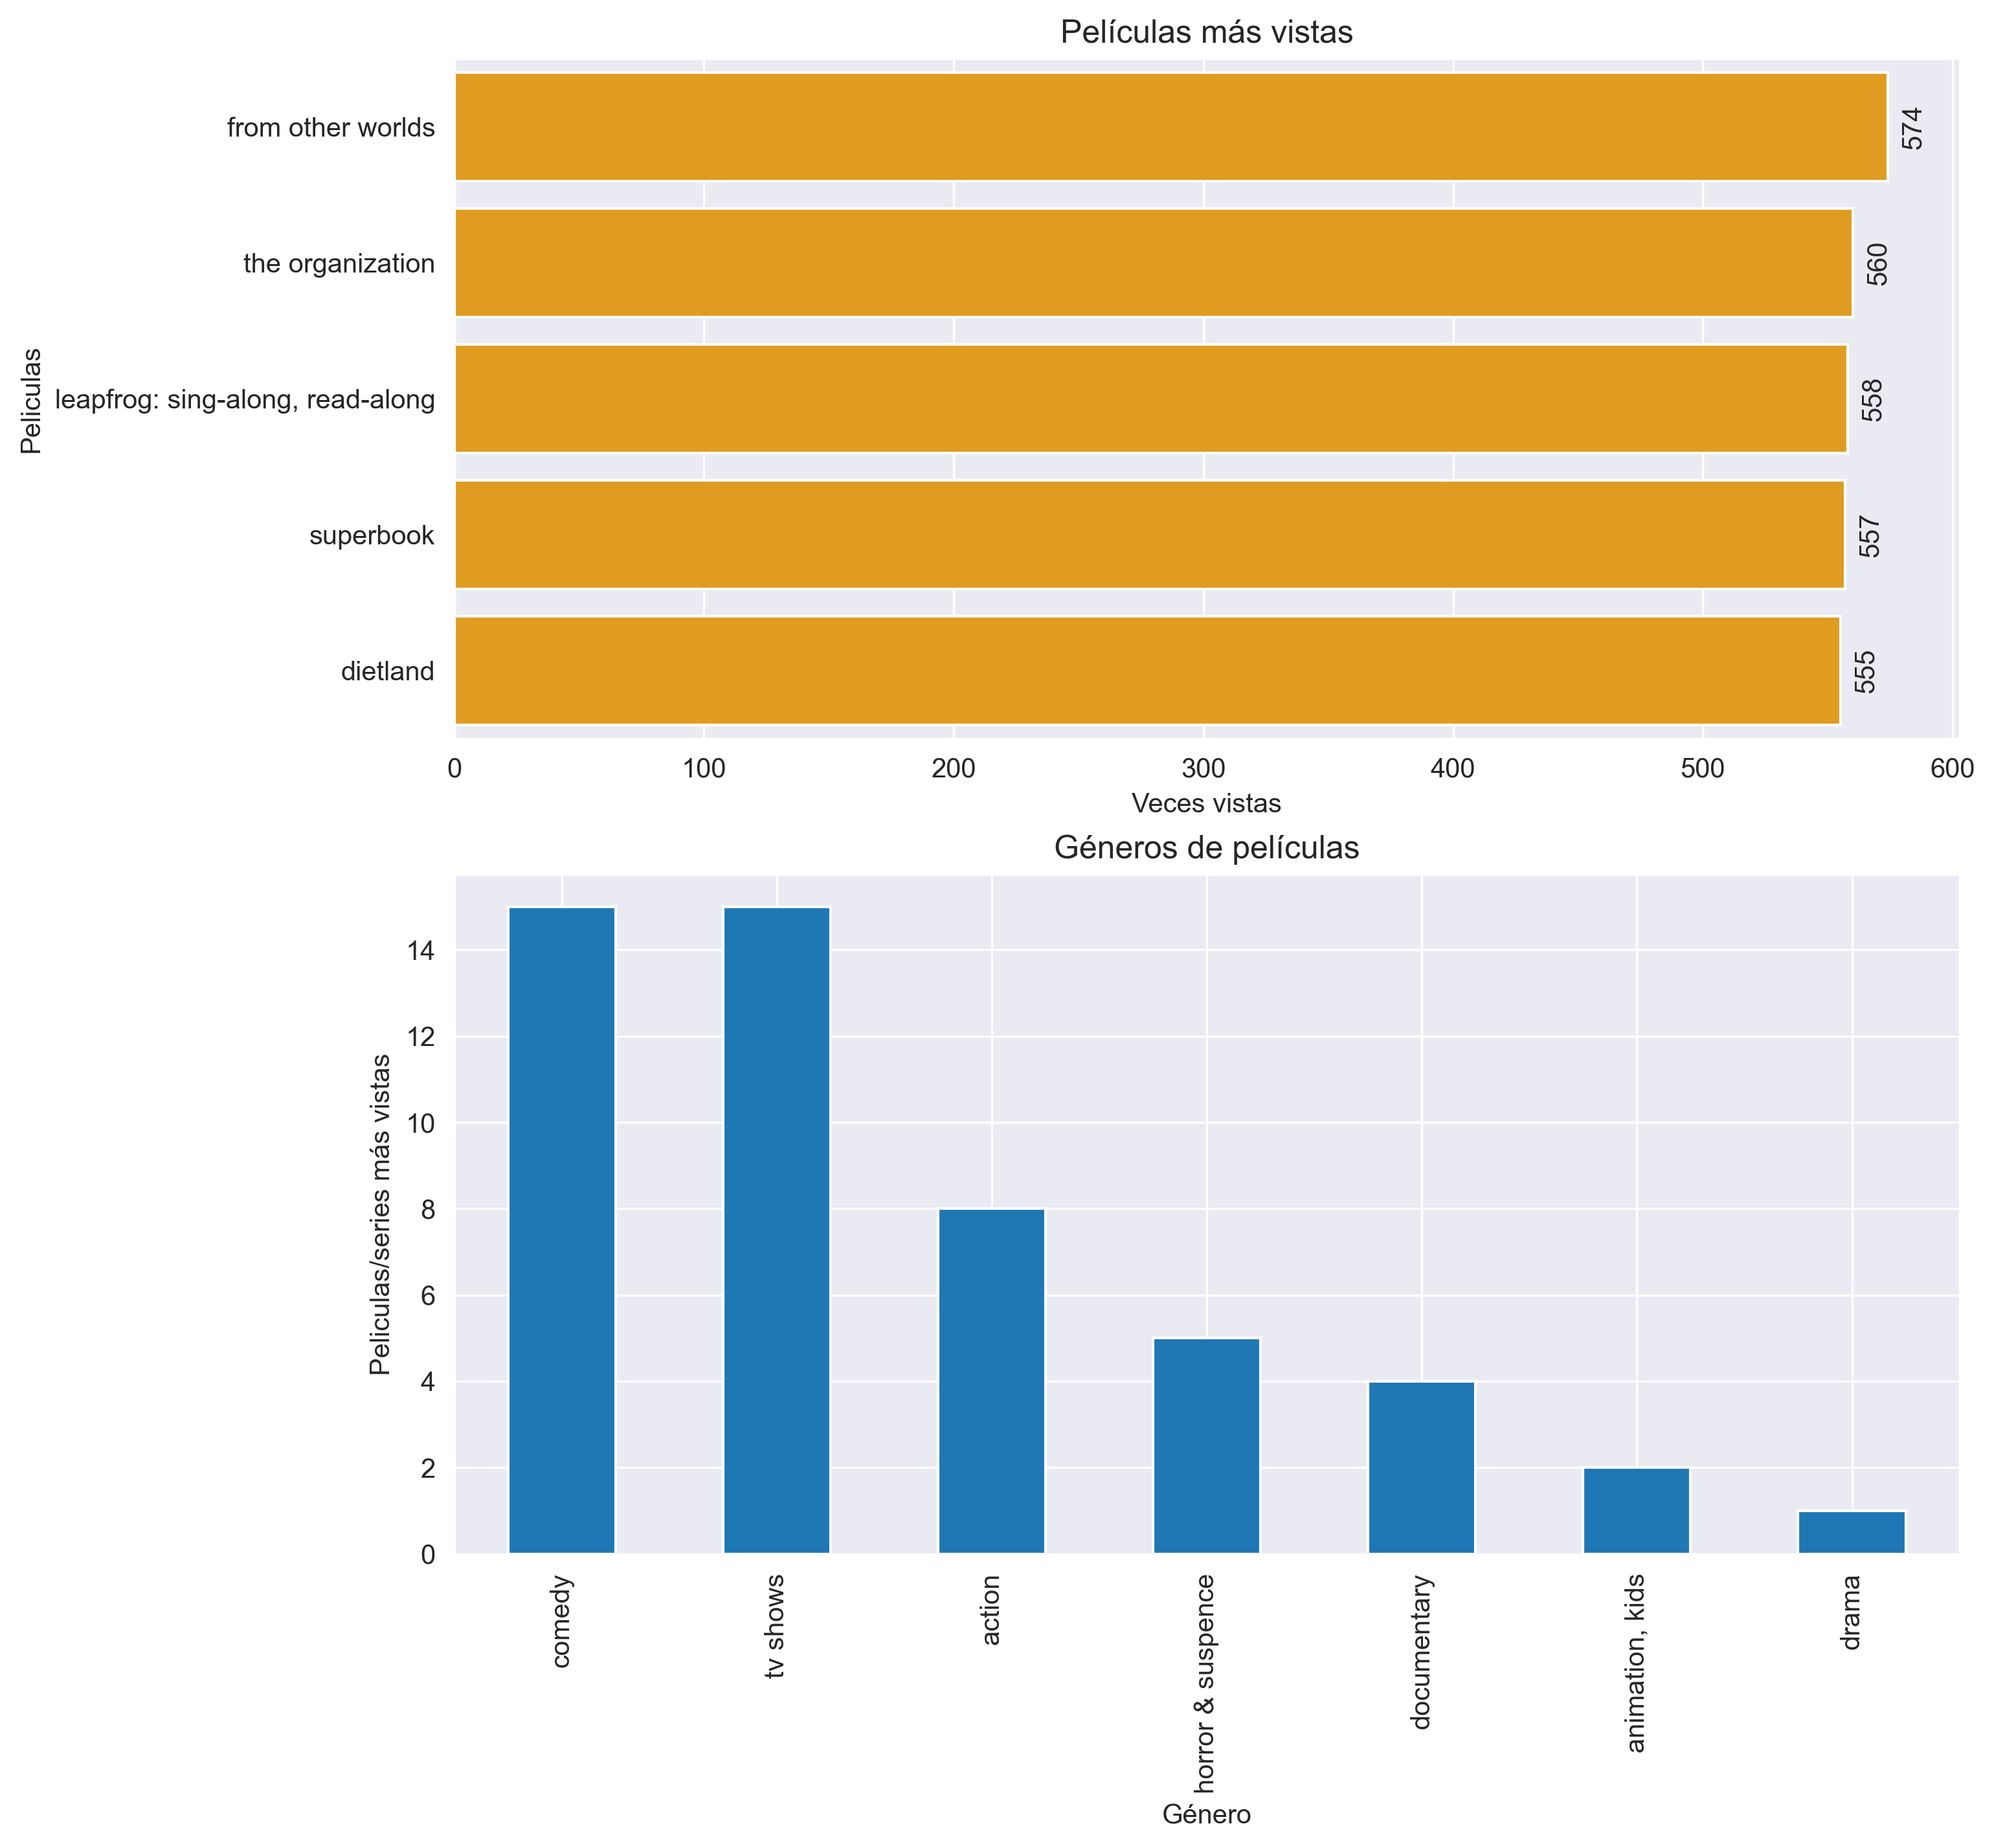

In [28]:

# Se crea subplot
fig, ax = plt.subplots(2, 1, figsize=(10, 10),dpi=300)

# top 5 peliculas más vistas
# Grafica de películas más vistas
sns.barplot(y='title', x='veces_vistas', data=top_movie_sample.head(5), color='orange', ax=ax[0])

# Etiquetas y título para la primera gráfica
ax[0].set_xlabel('Veces vistas')
ax[0].set_ylabel('Peliculas')
ax[0].set_title('Películas más vistas')

#  etiquetas de las barras en vertical en la primera gráfica
for i in ax[0].containers:
    ax[0].bar_label(i, label_type='edge', padding=5, rotation=90)

# Generos de peliculas más vistos

# Graficar la segunda gráfica en el subplot
top_movie_sample['genero'].value_counts().plot.bar(ax=ax[1])

# Etiquetas y título para la segunda gráfica
ax[1].set_title('Géneros de películas')
ax[1].set_xlabel('Género')
ax[1].set_ylabel('Peliculas/series más vistas')

plt.show()


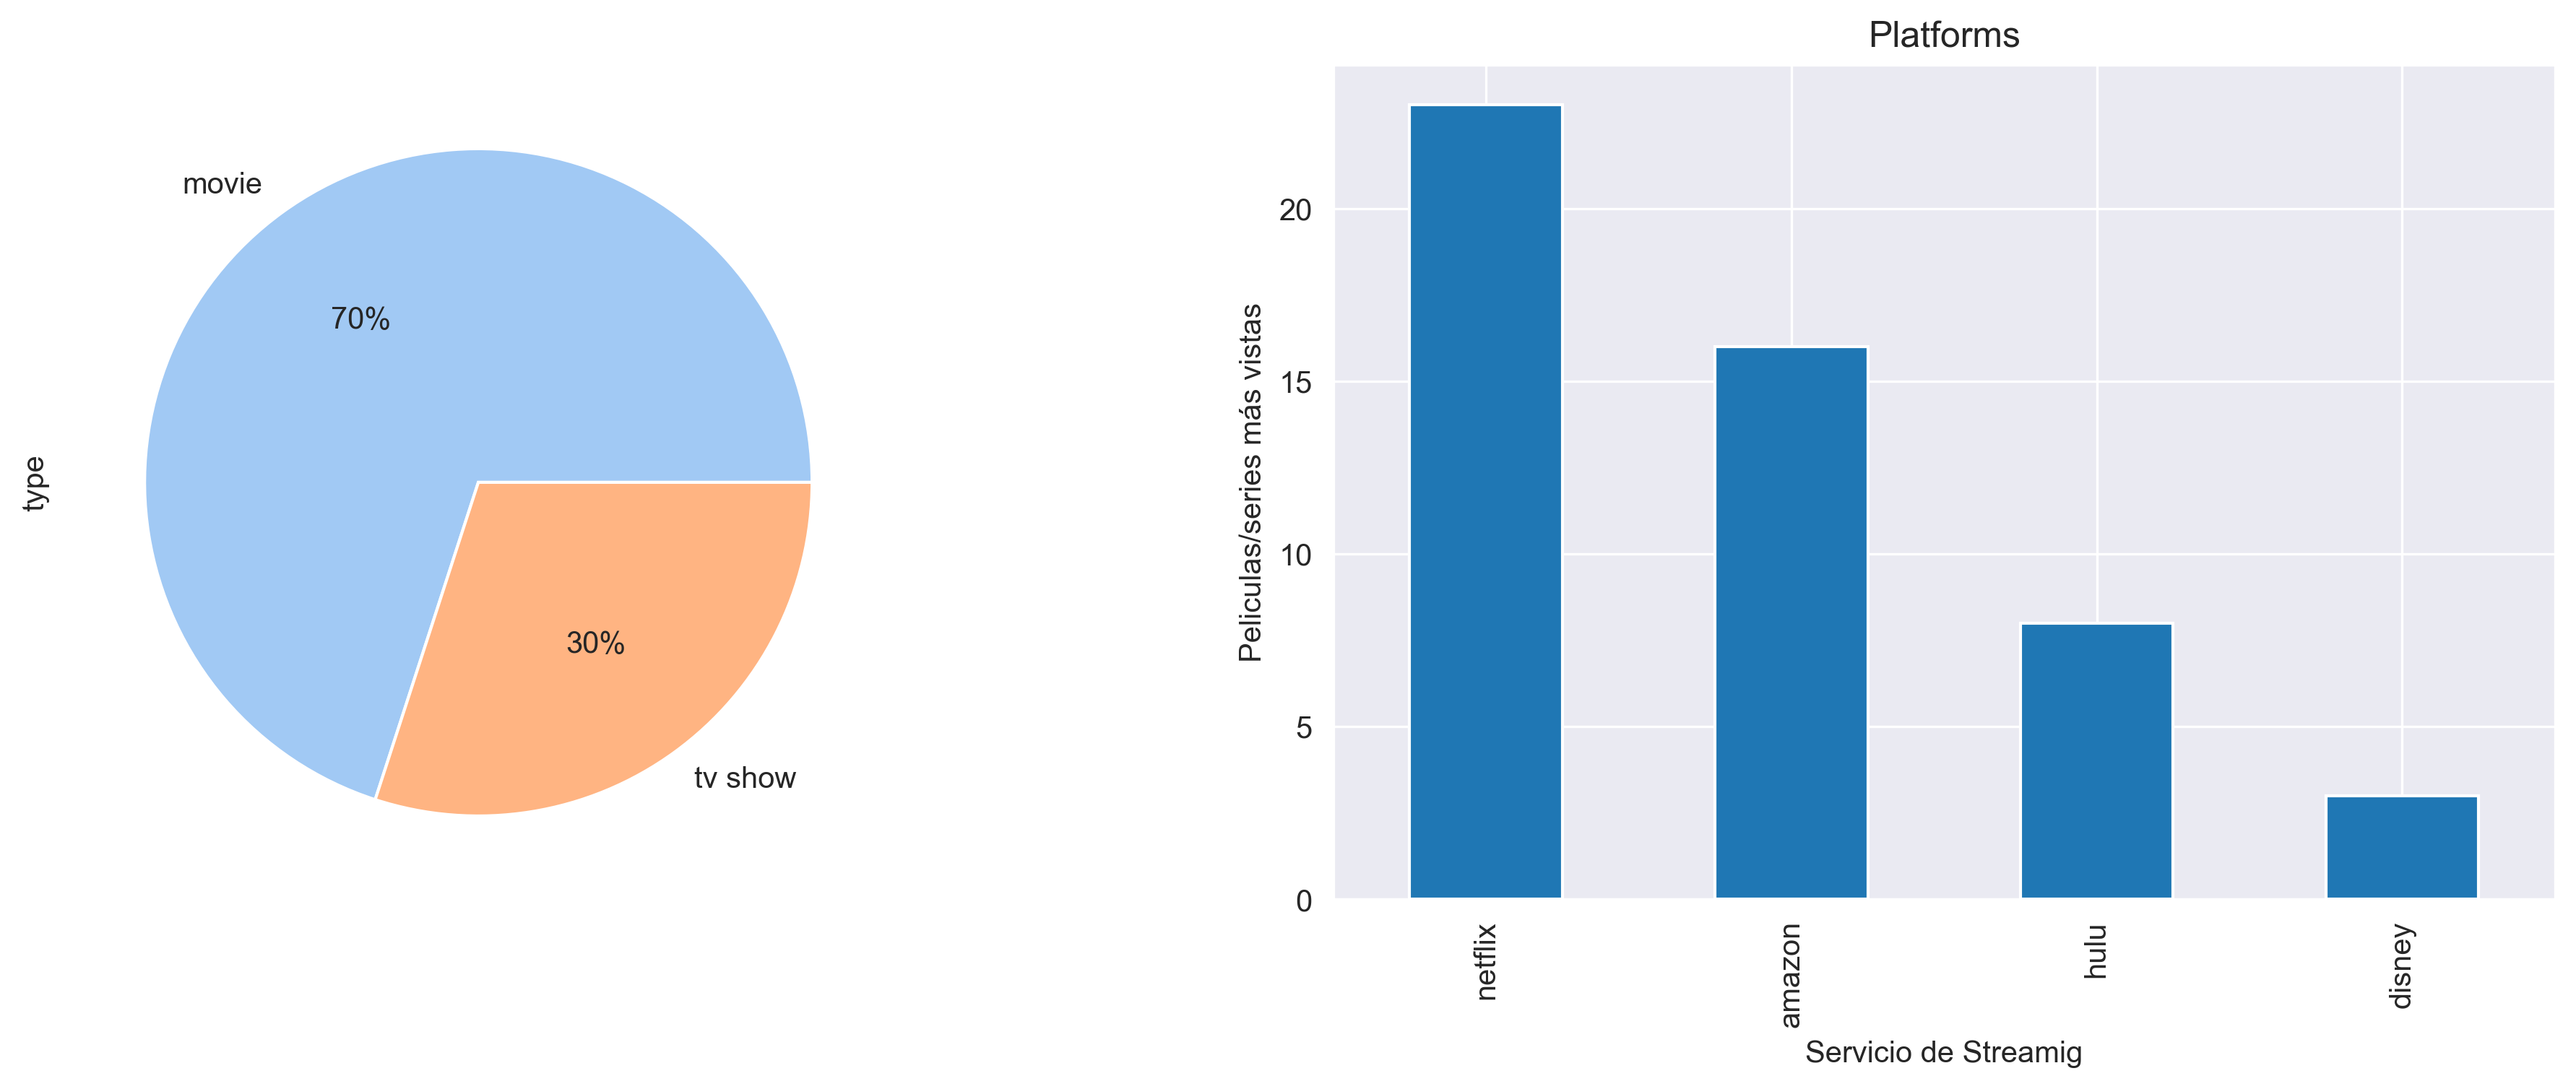

In [29]:
# Se crea subplot
f, ax = plt.subplots(nrows = 1, ncols =2, figsize = (16, 5),dpi=300)

# grafica de barras
# Plataformas de streaming más vistas

top_movie_sample['plataforma'].value_counts().plot.bar().set(  title = "Platforms",  
xlabel="Servicio de Streamig", ylabel = "Peliculas/series más vistas")

# grafica de torta
# Tipo de peliculas vistas

top_movie_sample['type'].value_counts().plot(ax=ax[0],kind='pie', colors=sns.color_palette('pastel'), autopct='%1.0f%%')

plt.show()

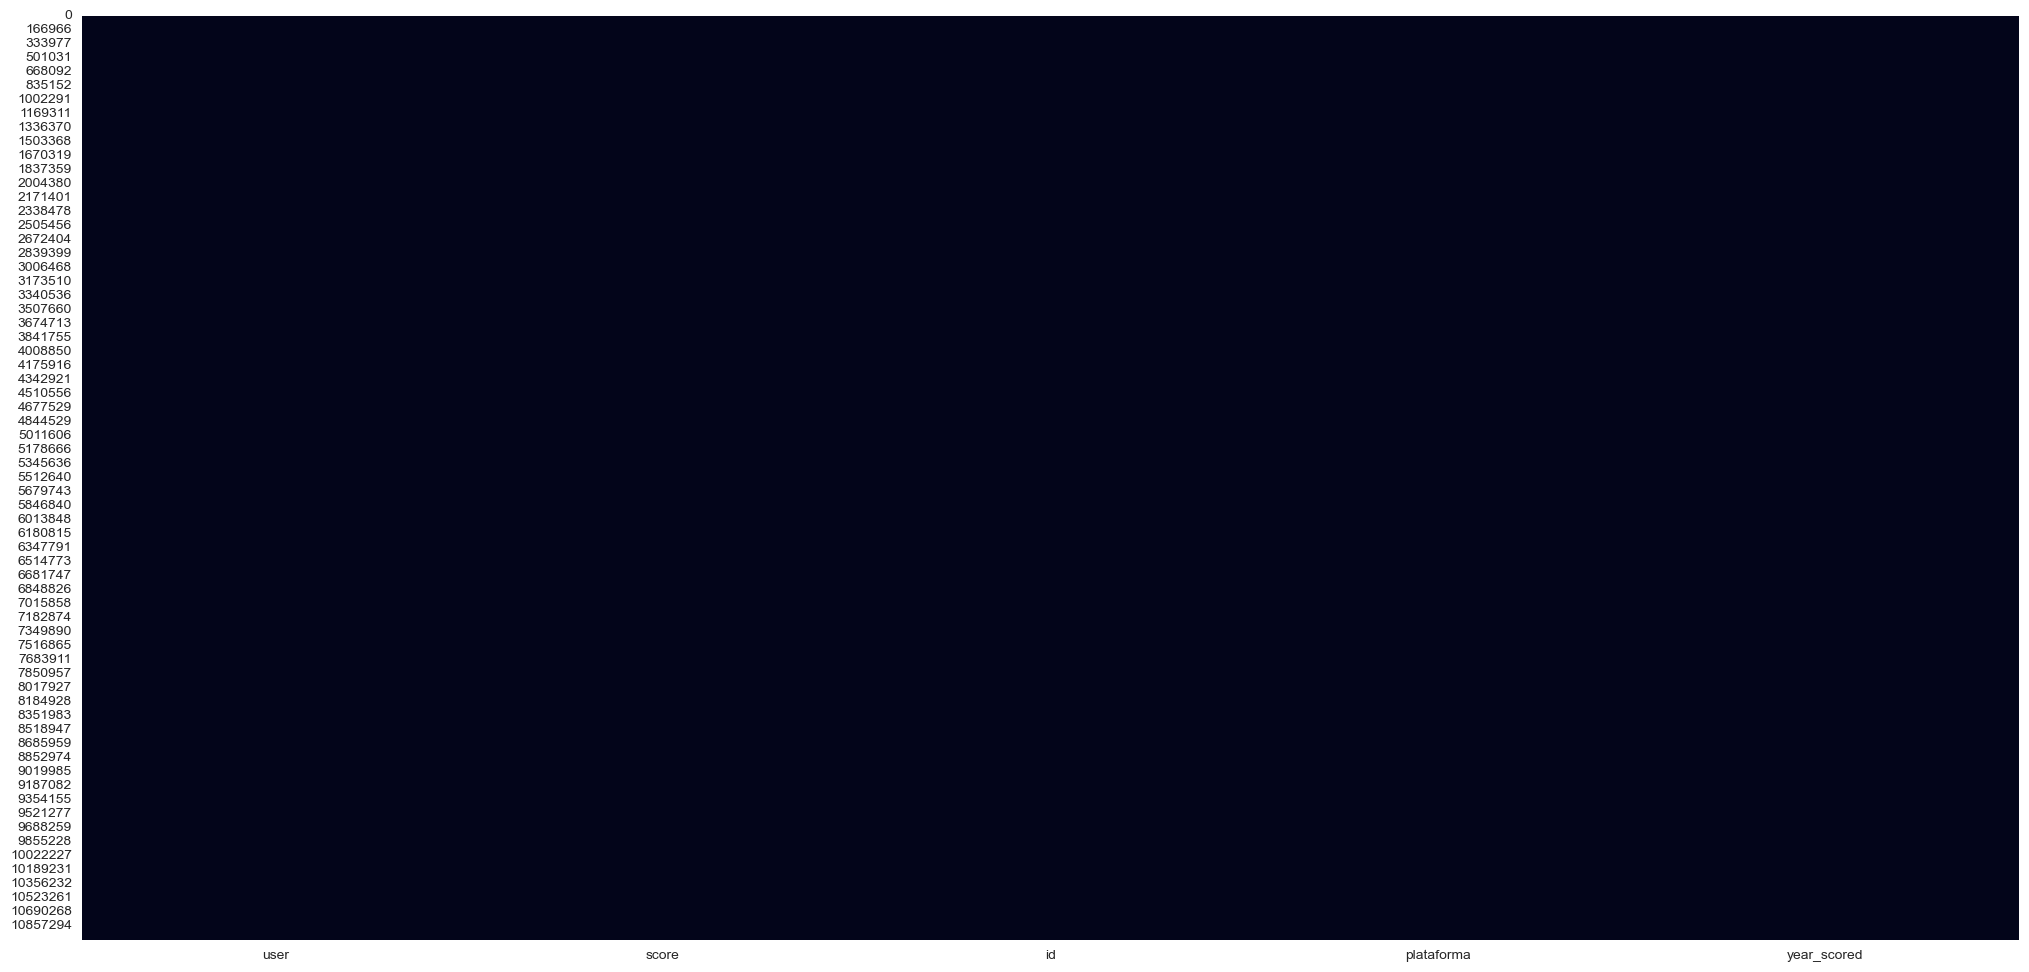

In [26]:
# Matriz para ver datos faltantes 

plt.figure(figsize= (25,12))
sns.heatmap(df_1.isnull(), cbar=False)
plt.show()